# Programming Assignment 1: Linear Regression
(Machine Learning Course)

## Linear Regression một biến 

### Giới thiệu

Bài viết sẽ hướng dẫn cách cài đặt linear regression một biến với Python. Nội dung dựa trên bài tập lập trình [linear regression](https://s3.amazonaws.com/spark-public/ml/exercises/on-demand/machine-learning-ex1.zip) trong khoá học [Machine Learning](https://www.coursera.org/learn/machine-learning) trên Coursera.

### Dữ liệu

Trong file ex1data1.txt, cột 1 là số dân của thành phố và cột 2 là lợi nhuận. Lợi nhuận có thể là số âm (thua lỗ).

Đọc vào dữ liệu với pandas.


In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('./ex1data1.txt', header=None)

df.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [2]:
# Mô tả thông tin cơ bản của dữ liệu
df.describe()

,0,1
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


### Plot dữ liệu

Trước khi bắt đầu tác vụ, việc điều tiên là hiểu dữ liệu. Vì dữ liệu có 2 chiều nên chúng ta có thể vẽ đồ thị scatter với ```matplotlib```

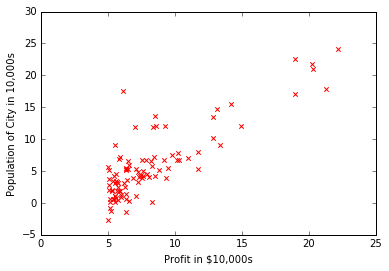

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(df.ix[:,0], df.ix[:,1], marker='x', c='r')
plt.xlabel('Profit in $10,000s')
plt.ylabel('Population of City in 10,000s')

### Gradient Descent

Trong phần này, chúng ta sẽ học cách *fit* các tham số $\theta$ của mô hình linear regression trên dữ liệu sử dụng phương pháp gradient descent.

#### Update Equations

Trong bài giảng, chúng ta đã biết để tìm tham số $\theta$, ta cần cực tiểu hoá cost function.

$$J(\theta)=\frac{1}{2m}\sum_{i=1}^{m}\left(h_{\theta}(x^{(i)})-y^{(i)}\right)^2$$

Ở đây hypothesis $h_{\theta}(x)$ được định nghĩa như sau:

$$h_{\theta}(x)=\theta^{T}x=\theta_{0} + \theta_{1}x_{1}$$

Để tìm tham số $\theta$ sao cho hàm cost $J(\theta)$ đạt cực tiểu, ta có thể dùng thuật toán "batch gradient descent." Tại mỗi vòng lặp ta thực hiện cập nhật sau đây:

$$\theta_{j}=\theta_{j}-\alpha\frac{1}{m}\sum_{i=1}^{m}\left(h_{\theta}(x^{(i)})-y^{(i)}\right)x_{j}^{(i)}$$ (Cập nhật đồng thời các giá trị $\theta_{j}$ với mọi $j$).

#### Tính cost function $J(\theta)$

Cài đặt hàm cost function bằng python như sau:

In [4]:
def compute_cost(X, y, theta):
    m = y.shape[0]
    return sum( ( np.sum(X * theta, axis=1) - y ) ** 2 ) / (2*m)

#### Cài đặt hàm gradient descent (trong trường hợp 1 biến số)

Trong cài đặt dưới đây, tôi sử dụng một cài đặt không thật sự hiệu quả lắm vì chưa sử dụng vectorization.

In [5]:
# X, y, theta có kiểu numpy.array
# X.shape = (m,2), y.shape=(m,), theta.shape=(2,)
def gradient_descent(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    J_history = np.zeros(num_iters);

    for iter in xrange(iterations):
        sum1 = 0
        sum2 = 0
        for i in xrange(m):
            tmp = sum( theta * X[i,:] ) - y[i]
            sum1 += tmp
            sum2 += tmp * X[i,1]
        
        theta[0] -= alpha * sum1/m;
        theta[1] -= alpha * sum2/m

        # Save the cost J in every iteration    
        J_history[iter] = compute_cost(X, y, theta);

    return (theta, J_history)

Sử dụng hàm gradient descent ở trên, tham số $\theta$ sẽ được ước lượng như dưới đây.

In [6]:
iterations = 1500;
alpha = 0.01;

theta = np.zeros( 2 );

X = df.ix[:,0].as_matrix()
y = df.ix[:,1].as_matrix()

m = y.shape[0]
X = X.reshape(m,1)

X = np.concatenate( ( np.ones( (m, 1) ), X ), axis = 1 )

print 'Initial cost function: %s' % compute_cost(X, y, theta)

theta, _ = gradient_descent(X, y, theta, alpha, iterations)

print 'Theta found by gradient descent: %s' % theta

# Predict values for population sizes of 35,000 and 70,000
predict1 = sum( [1, 3.5] *theta ) * 10000;
print('For population = 35,000, we predict a profit of %f' %
       predict1);

predict2 = sum( [1, 7] * theta ) * 10000;
print('For population = 70,000, we predict a profit of %f' %
       predict2);

Initial cost function: 32.0727338775
Theta found by gradient descent: [-3.63029144  1.16636235]
For population = 35,000, we predict a profit of 4519.767868
For population = 70,000, we predict a profit of 45342.450129


#### Vẽ đường thằng linear fit

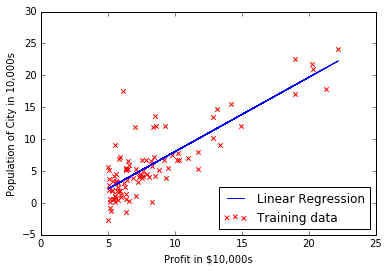

In [7]:
plt.scatter(df.ix[:,0], df.ix[:,1], marker='x', c='r', label='Training data')
plt.plot(X[:,1], np.sum(X * theta, axis=1), label='Linear Regression')
plt.xlabel('Profit in $10,000s')
plt.ylabel('Population of City in 10,000s')
plt.legend( loc = 'lower right')
plt.show()

### Visualizing $J(\theta)$

In [8]:
# Create a grid over which J is plotted
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of O's
J_vals = np.zeros( (theta0_vals.shape[0], theta1_vals.shape[0]) )

# Fill out J_vals
for i in xrange( theta0_vals.shape[0] ):
    for j in xrange( theta1_vals.shape[0] ):
        t = np.array( ( theta0_vals[i], theta1_vals[j] ) )
        J_vals[i,j] = compute_cost(X, y, t)

Để visuallize $J(\theta)$, chúng ta cần biết cách vẽ đồ thị 3-D với matplotlib.

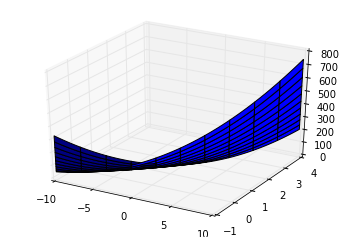

In [9]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(theta0_vals, theta1_vals, J_vals)
plt.show()

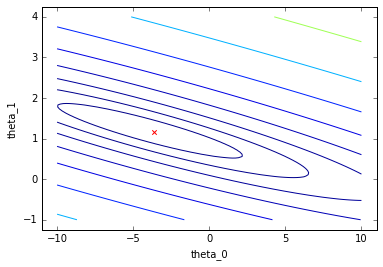

In [10]:
# Vẽ Contour plot
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

plt.contour(theta0_vals, theta1_vals, J_vals.T, np.logspace(-2, 3, 20))
plt.xlabel('theta_0')
plt.ylabel('theta_1')
plt.scatter(theta[0], theta[1], marker='x', c='r')
plt.show()

## Linear Regression nhiều biến

Bài tập này sẽ hướng dẫn bạn cách cài đặt linear regression với nhiều biến để dự đoán giá nhà. Chúng ta sẽ sử dụng dữ liệu trong file ```ex1data2.txt``` để thực hiện bài tập này. Trong dữ liệu này, cột đầu tiên là diện tích của căn hộ, cột thứ 2 là số phòng ngủ và cột thứ 3 là giá tiền của căn hộ.

Trước tiên, chúng ta sẽ đọc dữ liệu từ file. Khác với phần trước, thay vì sử dụng thư viện pandas, tôi sẽ thử sử dụng hàm ```numpy.loadtxt()``` để đọc dữ liệu. Chú ý là hàm này thích hợp nếu dữ liệu là dạng số.

In [11]:
import numpy as np

data = np.loadtxt('ex1data2.txt', delimiter=',')
X = data[:,0:2]
y = data[:,[2]]

print X.shape, y.shape

(47, 2) (47, 1)


In [12]:
print data[0:10]

[[  2.10400000e+03   3.00000000e+00   3.99900000e+05]
 [  1.60000000e+03   3.00000000e+00   3.29900000e+05]
 [  2.40000000e+03   3.00000000e+00   3.69000000e+05]
 [  1.41600000e+03   2.00000000e+00   2.32000000e+05]
 [  3.00000000e+03   4.00000000e+00   5.39900000e+05]
 [  1.98500000e+03   4.00000000e+00   2.99900000e+05]
 [  1.53400000e+03   3.00000000e+00   3.14900000e+05]
 [  1.42700000e+03   3.00000000e+00   1.98999000e+05]
 [  1.38000000e+03   3.00000000e+00   2.12000000e+05]
 [  1.49400000e+03   3.00000000e+00   2.42500000e+05]]


### Feature Normalization

Vì giá trị của diện tích nhà lớn hơn khoảng 1000 lần so với số phòng, nên để thuật toán gradient descent hội tụ nhanh hơn, chúng ta cần làm bước feature normalization.

Thủ tục feature normalization gồm 2 bước:

- Lấy giá trị của các features trừ giá trị trung bình.
- Giá trị thu được sau khi trừ giá trị trung bình sẽ chia cho độ lệch tiêu chuẩn của features.

In [13]:
mu = X.mean(axis=0)
sigma = X.std(axis=0, ddof=1)

print mu
print sigma

[ 2000.68085106     3.17021277]
[  7.94702354e+02   7.60981887e-01]


Chú ý hàm trong hàm ```np.std()```, tôi có tuỳ chọn ```ddof=1``` có nghĩa là số bậc tự do ("Delta Degrees of Freedom"). Có tuỳ chọn này, kết quả tính standard deviation sẽ giống với hàm std() trong MATLAB.

In [14]:
X = (X - mu)/sigma

### Cài đặt Gradient Descent cho trường hợp nhiều biến

In [15]:
def compute_cost_multi(X, y, theta):
    m = y.shape[0]
    return  ( ( np.dot(X, theta) - y ) ** 2 ).sum() / (2*m)

# alpha là learning rate
# num_iters là số vòng lặp
def gradient_descent_multi(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    theta = np.zeros( (X.shape[1], 1) );
    J_history = np.zeros(num_iters)

    for iter in xrange(num_iters):
        # Compute the vector delta
        delta = np.zeros( (X.shape[1],1) )
        for i in xrange( X.shape[1] ):
            delta[i] =  ( (np.dot(X, theta) - y) * X[:,[i]] ).sum() / m

        theta = theta - alpha * delta
        J_history[iter] = compute_cost_multi(X, y, theta)

    return theta, J_history

Trước khi fit tham số $\theta$ bằng dữ liệu đã cho, ta phải thêm cột giá trị 1 vào trước ma trận $X$ và khởi tạo learning rate và số vòng lặp.

In [16]:
m = y.shape[0]
alpha = 0.01
num_iters = 400
X = np.concatenate( ( np.ones( (m, 1) ), X ), axis = 1 )

Tính $\theta$ và in ra kết quả.

In [17]:
theta, J_history = gradient_descent_multi(X, y, theta, alpha, num_iters)

print theta.T

[[ 334302.06399328  100087.11600585    3673.54845093]]


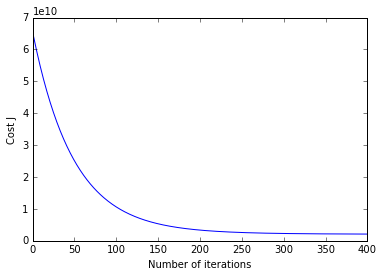

In [18]:
# Plot the convergence graph
plt.plot( range(1, J_history.shape[0] + 1), J_history )
plt.xlabel('Number of iterations');
plt.ylabel('Cost J');
plt.show()

In [19]:
# Estimate the price of a 1650 sq-ft, 3 br house
# Recall that the first column of X is all-ones. Thus, it does
# not need to be normalized.
price = 0; 
print mu
print sigma

unseen_data = np.array( [1650, 3], dtype=np.float64 );
unseen_data[0] = (unseen_data[0] - mu[0])/sigma[0];
unseen_data[1] = (unseen_data[1] - mu[1])/sigma[1];
unseen_data = np.concatenate( (np.ones(1), unseen_data) );
price = (theta.T * unseen_data).sum();

print( 'Predicted price of a 1650 sq-ft, 3 br house ' 
       '(using gradient descent): $%f\n' % price);

[ 2000.68085106     3.17021277]
[  7.94702354e+02   7.60981887e-01]
Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): $289314.620338



### Normal Equations

Ngoài thuật toán Gradient Descent để fit parameters $\theta$, ta có thể tính trực tiếp $\theta$ bằng công thức sau đây:

$$\theta = \left(X^TX\right)^{-1}X^Ty$$

Trong Python, ta có thể cài đặt phương trình này như sau:

In [20]:
def normal_eqn(X, y):
    theta = np.zeros( (X.shape[0], 1) )
    theta = np.dot( np.dot( np.linalg.pinv( np.dot(X.T, X) ), X.T ), y )

    return theta

Áp dụng hàm đã cài đặt, ta tính $\theta$ như sau:

In [21]:
# Normal Equations
print 'Solving with Normal Equations'
data = np.loadtxt('ex1data2.txt', delimiter=',')
X = data[:,0:2]
y = data[:,[2]]
m = y.shape[0]

X = np.concatenate( ( np.ones( (m, 1) ), X ), axis = 1 )

theta = normal_eqn(X, y)
print 'Theta computed from Normal Equations: %s' % theta.T

x = np.array( [1, 1650, 3 ], dtype=np.float64 )
price = (theta.T * x).sum();

print( 'Predicted price of a 1650 sq-ft, 3 br house ' 
       '(using normal quations): $%f\n' % price);

Solving with Normal Equations
Theta computed from Normal Equations: [[ 89597.90954355    139.21067402  -8738.01911255]]
Predicted price of a 1650 sq-ft, 3 br house (using normal quations): $293081.464335

